In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")
device

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce RTX 2060 SUPER


device(type='cuda')

In [2]:
!pip install transformers

In [3]:
import pandas as pd
df = pd.read_csv("train_dataset_train.csv")
df

,id,name,groups
0,2442477,БЗМЖ Молоко ультропаст.Вкуснотеево900гр.3.2%ПЭТ/б,3
1,1564599,"15.6"" Ноутбук Acer Nitro 5 (AN515-54-58LL)(FHD...",10
2,841848,ЖЕВ.РЕЗИНКА ОРБИТ НЕЖНАЯ МЯТА XX 46153708,10
3,960348,Агрикола Грунт универсальный 50 л (Техноэкспор...,10
4,398622,"1. Игристое вино ""Каспийская коллекция"" ЗГУ ""Д...",10
...,...,...,...
658059,5324046,8714100917541 ШАМПУНЬ TRESEMME BEA,10
658060,2971888,1/1 Ксилен 0.1% капли назальные 10мл фл.-кап. ...,10
658061,4713243,СЫР колбасный ЯНТАРЬ 1 кг Воронеж,10
658062,152642,Боди длинный рукав для девочек:,10


In [4]:
# Get the lists of sentences and their labels.
sentences = df.name.values
labels = df.groups.values

In [5]:
from transformers import BertTokenizer,AutoTokenizer, AutoModelForMaskedLM,AutoModelForSequenceClassification
from transformers import DebertaTokenizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification
# Load the BERT tokenizer.
print('Loading DEBERTA tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
# tokenizer = AutoTokenizer.from_pretrained('distilroberta-base', do_lower_case=True)
# tokenizer = AutoTokenizer.from_pretrained('roberta-large', do_lower_case=True)

Loading DEBERTA tokenizer...


In [6]:
# Print the original sentence.
print(' Original: ', sentences[3456])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[3456]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[3456])))

 Original:  Хлеб Ржано-пшеничный 550г Провинция
Tokenized:  ['х', '##л', '##е', '##б', 'р', '##ж', '##ан', '##о', '-', 'п', '##ш', '##е', '##н', '##и', '##ч', '##н', '##ы', '##и', '550', '##г', 'п', '##р', '##ов', '##и', '##н', '##ц', '##ия']
Token IDs:  [1200, 29436, 15290, 29740, 1195, 29743, 28995, 14150, 1011, 1194, 29753, 15290, 18947, 10325, 29752, 18947, 29113, 10325, 13274, 29741, 1194, 16856, 19259, 10325, 18947, 29751, 23483]


In [7]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  118


In [8]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 118,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
D:\conda\envs\torch_1_9\lib\site-packages\transformers\tokenization_utils_base.py:2263: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  БЗМЖ Молоко ультропаст.Вкуснотеево900гр.3.2%ПЭТ/б
Token IDs: tensor([  101,  1181, 29744, 29745, 29743,  1191, 14150, 29436, 14150, 23925,
        14150,  1198, 29436, 23742, 22919, 16856, 14150, 29746, 10260, 29747,
        22919,  1012,  1182, 23925, 29748, 29747, 18947, 14150, 22919, 15290,
        15290, 25529, 14150, 21057,  2692, 29741, 16856,  1012,  1017,  1012,
         1016,  1003,  1194, 29756, 22919,  1013,  1181,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])


In [9]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

592,257 training samples
65,807 validation samples


In [10]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [11]:
from transformers import BertForSequenceClassification, AdamW, DebertaForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 11, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)


# model = AutoModelForSequenceClassification.from_pretrained(
#     "distilroberta-base", # Use the 12-layer BERT model, with an uncased vocab.
#     num_labels = 11, # The number of output labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.   
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
# )



# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [12]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [13]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


D:\conda\envs\torch_1_9\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [14]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 1

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [15]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [16]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [17]:
model.load_state_dict(torch.load('bert_5epoch.pth'))

<All keys matched successfully>

In [18]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        res = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            res = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = res['loss']
        logits = res['logits']

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 1 ========
Training...
  Batch    40  of  18,509.    Elapsed: 0:00:16.
  Batch    80  of  18,509.    Elapsed: 0:00:32.
  Batch   120  of  18,509.    Elapsed: 0:00:48.
  Batch   160  of  18,509.    Elapsed: 0:01:04.
  Batch   200  of  18,509.    Elapsed: 0:01:21.
  Batch   240  of  18,509.    Elapsed: 0:01:37.
  Batch   280  of  18,509.    Elapsed: 0:01:53.
  Batch   320  of  18,509.    Elapsed: 0:02:09.
  Batch   360  of  18,509.    Elapsed: 0:02:26.
  Batch   400  of  18,509.    Elapsed: 0:02:42.
  Batch   440  of  18,509.    Elapsed: 0:02:58.
  Batch   480  of  18,509.    Elapsed: 0:03:15.
  Batch   520  of  18,509.    Elapsed: 0:03:31.
  Batch   560  of  18,509.    Elapsed: 0:03:48.
  Batch   600  of  18,509.    Elapsed: 0:04:04.
  Batch   640  of  18,509.    Elapsed: 0:04:21.
  Batch   680  of  18,509.    Elapsed: 0:04:38.
  Batch   720  of  18,509.    Elapsed: 0:04:55.
  Batch   760  of  18,509.    Elapsed: 0:05:11.
  Batch   800  of  18,509.    Elapsed: 0:05:2

  Batch 6,840  of  18,509.    Elapsed: 0:48:19.
  Batch 6,880  of  18,509.    Elapsed: 0:48:37.
  Batch 6,920  of  18,509.    Elapsed: 0:48:53.
  Batch 6,960  of  18,509.    Elapsed: 0:49:10.
  Batch 7,000  of  18,509.    Elapsed: 0:49:27.
  Batch 7,040  of  18,509.    Elapsed: 0:49:44.
  Batch 7,080  of  18,509.    Elapsed: 0:50:01.
  Batch 7,120  of  18,509.    Elapsed: 0:50:18.
  Batch 7,160  of  18,509.    Elapsed: 0:50:35.
  Batch 7,200  of  18,509.    Elapsed: 0:50:52.
  Batch 7,240  of  18,509.    Elapsed: 0:51:08.
  Batch 7,280  of  18,509.    Elapsed: 0:51:25.
  Batch 7,320  of  18,509.    Elapsed: 0:51:42.
  Batch 7,360  of  18,509.    Elapsed: 0:51:59.
  Batch 7,400  of  18,509.    Elapsed: 0:52:16.
  Batch 7,440  of  18,509.    Elapsed: 0:52:33.
  Batch 7,480  of  18,509.    Elapsed: 0:52:50.
  Batch 7,520  of  18,509.    Elapsed: 0:53:07.
  Batch 7,560  of  18,509.    Elapsed: 0:53:24.
  Batch 7,600  of  18,509.    Elapsed: 0:53:40.
  Batch 7,640  of  18,509.    Elapsed: 0

  Batch 13,600  of  18,509.    Elapsed: 1:36:03.
  Batch 13,640  of  18,509.    Elapsed: 1:36:20.
  Batch 13,680  of  18,509.    Elapsed: 1:36:37.
  Batch 13,720  of  18,509.    Elapsed: 1:36:54.
  Batch 13,760  of  18,509.    Elapsed: 1:37:11.
  Batch 13,800  of  18,509.    Elapsed: 1:37:28.
  Batch 13,840  of  18,509.    Elapsed: 1:37:45.
  Batch 13,880  of  18,509.    Elapsed: 1:38:02.
  Batch 13,920  of  18,509.    Elapsed: 1:38:19.
  Batch 13,960  of  18,509.    Elapsed: 1:38:36.
  Batch 14,000  of  18,509.    Elapsed: 1:38:53.
  Batch 14,040  of  18,509.    Elapsed: 1:39:10.
  Batch 14,080  of  18,509.    Elapsed: 1:39:27.
  Batch 14,120  of  18,509.    Elapsed: 1:39:44.
  Batch 14,160  of  18,509.    Elapsed: 1:40:01.
  Batch 14,200  of  18,509.    Elapsed: 1:40:18.
  Batch 14,240  of  18,509.    Elapsed: 1:40:35.
  Batch 14,280  of  18,509.    Elapsed: 1:40:52.
  Batch 14,320  of  18,509.    Elapsed: 1:41:09.
  Batch 14,360  of  18,509.    Elapsed: 1:41:26.
  Batch 14,400  of  

In [19]:
torch.save(model.state_dict(), "bert_6epoch.pth")

In [20]:
import pandas as pd

# Display floats with two decimal places.
# pd.set_option('precision', 11)
pd.options.display.precision
# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.011134,0.006263,0.998557,2:10:51,0:04:52


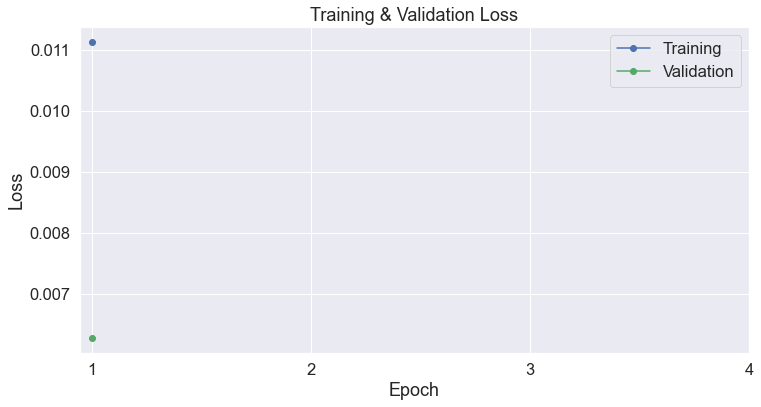

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [22]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("new_test_dataset_test.csv")
# df = df.dropna()
df

,id,name
0,10529,"КАРАМЕЛЬ ""ЛАКОМКА-СУПЕРМОЛОЧНАЯ"" ВЕС (РОТ ФРОНТ)"
1,10530,"2: 3637233 РАЭ Масло ТРАДИЦ.слив.82,5% 1"
2,10531,960012-LG NS Бинт эластичный Classic лаймовый...
3,10532,Вода мин. 1.5л пл/у (Сахалинская)
4,10533,Ролики натяжителя ремня AMD.GTA0740 AMD
...,...,...
282222,292751,Пельмени Московские Пижанка 800г
282223,292752,Активиа 135гр Пробиотик малина
282224,292753,Базилик овощной
282225,292754,JACOBS Millicano Кофе Crema Espresso раств с мол


In [23]:
import pandas as pd

# Load the dataset into a pandas dataframe.
# df = pd.read_csv("./cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.name.values
# labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 118,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
# labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 282,227



D:\conda\envs\torch_1_9\lib\site-packages\transformers\tokenization_utils_base.py:2263: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [24]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
#   label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
#   true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 282,227 test sentences...
    DONE.


In [25]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

In [26]:
flat_predictions

array([10, 10, 10, ..., 10, 10, 10], dtype=int64)

In [27]:
# df = pd.read_csv("new_test_dataset_test.csv")
# df = df.dropna()
df["groups"] = flat_predictions
df = df.drop("name", axis=1)
df

,id,groups
0,10529,10
1,10530,10
2,10531,10
3,10532,0
4,10533,10
...,...,...
282222,292751,10
282223,292752,7
282224,292753,10
282225,292754,10


In [28]:
df.to_csv('sample_submission14.csv', index= False)

In [36]:
df

,id,groups
0,10529,10
1,10530,10
2,10531,10
3,10532,0
4,10533,10
...,...,...
282222,292751,10
282223,292752,7
282224,292753,10
282225,292754,10


In [37]:
sub = pd.read_csv("sample_solution.csv")
sub

,id,groups
0,2271768,0.0
1,5495560,0.0
2,4390924,0.0
3,1951592,0.0
4,1037434,0.0
...,...,...
282222,4745550,0.0
282223,339082,0.0
282224,1327360,0.0
282225,679104,0.0


In [38]:
sub.groups = flat_predictions
sub

,id,groups
0,2271768,10
1,5495560,10
2,4390924,10
3,1951592,0
4,1037434,10
...,...,...
282222,4745550,10
282223,339082,7
282224,1327360,10
282225,679104,10


In [39]:
sub.to_csv('sample_submission12.csv', index= False)

In [40]:
sub

,id,groups
0,2271768,10
1,5495560,10
2,4390924,10
3,1951592,0
4,1037434,10
...,...,...
282222,4745550,10
282223,339082,7
282224,1327360,10
282225,679104,10
